# VECTORS AND SIMILARITY

Vectors are sets of numbers that represent something. 

Your location in the world is a good example of a vector. Each location in the world has two coordinates - longitude and latitude. These can be thought of as a 2-dimensional vector representation - the first dimension is longitude, the second is latitude.

Vectors have both direction and length, and using a simple mathematical operation called the $ dot product $ it's easy to determine how similar one vector is to another. Vectors that point in similar directions with similar lengths will have a high dot product, whereas those that point in opposite directions or have wildly different lenghts will have lower dot products.

Machine Learning relies heavily on finding relatinoships between data and identifying similarities - for this reason the dot product is fundamental.

**Dot Product Calculation**</p>
If I have two vectors $p$ and $q$, each with two features $(a1, b1)$ and $(a2, b2)$

i.e. $\mathbf{p} = \begin{pmatrix} a_1 \\ b_1 \end{pmatrix}$ and $\mathbf{q} = \begin{pmatrix} a_2 \\ b_2 \end{pmatrix}$

**Dot product (geometric form)**</p>
- $\mathbf{p} \cdot \mathbf{q} = \|\mathbf{p}\| \|\mathbf{q}\| \cos(\theta)$

where:</p>
- $\|\mathbf{p}\| = \sqrt{a_1^2 + b_1^2}$
- $\|\mathbf{q}\| = \sqrt{a_2^2 + b_2^2}$
- $\theta$ is the angle between the vectors.

**Dot product (algebraic form):**</p>
- $\mathbf{p} \cdot \mathbf{q} = a_1 a_2 + b_1 b_2$




In [2]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt

# this is probably the default, but just in case
%matplotlib inline

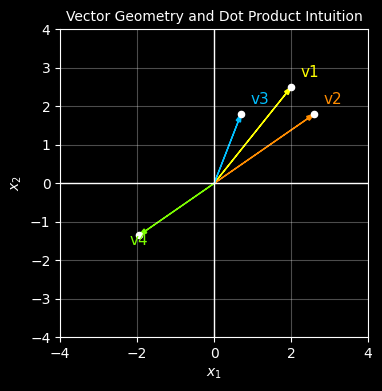

In [5]:

# ------------------------------------------------------------
# Plot four vectors - each vector has 2 dimensions x1 and x2
#
# v1, v2 : quadrant 1, similar length, small angle between them
# v3     : same direction as v1 but shorter
# v4     : same length as v1 but opposite direction (quadrant 3)
# ------------------------------------------------------------

# ------------------------------------------------------------
# Define vectors
# ------------------------------------------------------------
v1 = np.array([2.0, 2.5])
v2 = np.array([2.6, 1.8])
v3 = np.array([0.7, 1.8])
v4 = -0.75*(v2)

vectors = [v1, v2, v3, v4]
labels = ["v1", "v2", "v3", "v4"]

# One colour per vector (matplotlib named colours)
colors = ["yellow", "darkorange", "deepskyblue", "lawngreen"]

# ------------------------------------------------------------
# Plot
# ------------------------------------------------------------
with plt.style.context("dark_background"):
    fig, ax = plt.subplots(figsize=(4, 4))

    
    for v, label, col in zip(vectors, labels, colors):
        # plot the points
        ax.scatter(v[0], v[1], s=20, color="white", zorder=3)
        
        # plot an arrow to each point
        ax.arrow(
            0, 0, v[0], v[1],
            length_includes_head=True,
            head_width=0.12,
            head_length=0.2,
            linewidth=1,
            color=col
        )

        # label each vector (needs to be offset)
        offset = 0.25
        ax.text(
            v[0] + np.sign(v[0]) * offset,
            v[1] + np.sign(v[1]) * offset,
            label,
            color=col,
            fontsize=11
        )

    ax.axhline(0, color="white", linewidth=1)
    ax.axvline(0, color="white", linewidth=1)

    ax.set_aspect("equal", adjustable="box")
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.grid(True, alpha=0.3)

    ax.set_xlabel(r"$x_1$")
    ax.set_ylabel(r"$x_2$")
    ax.set_title("Vector Geometry and Dot Product Intuition", fontsize="10")

plt.show()


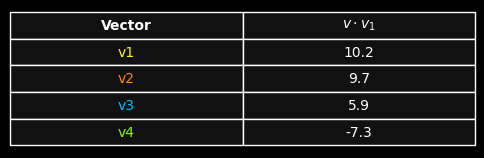

In [ ]:
# ------------------------------------------------------------
# Compute dot products against v1
# ------------------------------------------------------------
dot_products = [np.dot(v1, v) for v in vectors]
table_data = [[label, f"{dp:.1f}"] for label, dp in zip(labels, dot_products)]

# ------------------------------------------------------------
# Draw table only
# ------------------------------------------------------------
with plt.style.context("dark_background"):
    fig, ax = plt.subplots(figsize=(6, 1.8))
    ax.axis("off")

    table = ax.table(
        cellText=table_data,
        colLabels=["Vector", r"$v \cdot v_1$"],
        cellLoc="center",
        colLoc="center",
        loc="center"
    )

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.0, 1.6)

    # Style cells
    for (row, col), cell in table.get_celld().items():
        cell.set_edgecolor("white")
        cell.set_linewidth(1.0)
        cell.set_facecolor("#111111")

        # Header row
        if row == 0:
            cell.get_text().set_color("white")
            cell.get_text().set_fontweight("bold")

        # First column: colour matches vector colour
        elif col == 0:
            cell.get_text().set_color(colors[row - 1])

        # Dot product column
        else:
            cell.get_text().set_color("white")

plt.show()



**Conclusion**</p>
Visually it's clear that vector v2 is most like vector v1 because it has a similar length and direction. v4, on the other hand, scores a negative dot product because it's pointing in a completely different direction.</p>
The key insight is that if we can represent real-world items as vectors, there's a simple mathematical formula to determine similarity. In fact, some early language models do exactly this: they represent individual words as vectors (one vector per word in the dictionary), they're then 'trained' on thousands of documents. During training, the vector representations of words are adjusted so that words with similar meanings end up with vectors whose dot product yields high values. For example, the word 'King' and 'Queen' would score high dotproducts whereas the word 'King' and 'Tree' wouldn't (unless many of the training documents somehow contained stories about Kings who spend a lot of time in forests!)</p>
This same principle — measuring similarity via dot products — underpins modern embedding techniques used in transformers and large language models today.